# Regresion KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

# Cargar datos

In [3]:
# Es una base de datos de bloques de deparamentos en california

# Cargar los datos
data = pd.read_csv("housing.csv")

data

# median_house_value es el objetivo de predicción

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [4]:
# Vemos la cantidad y tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Eliminar valores NaN

In [5]:
# Eliminaos de la tabla las filas con alores NaN
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# Des-Categorizar en columnas con 1 y 0 las categorias de la variable "ocean_proximity"

In [6]:
# Ver valores existentes
data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# Eliminar la columna "ocean_proximity" y agregar columnas con valores 1 si contenian el valor de la columna o 0 si no
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(["ocean_proximity"], axis = 1)

# Crear columnas con ratios de otras

In [8]:
# Creamos una columna con el ratio de cuantas piezas hay por cada habitación
data["bedroom_ratio"] = data["total_bedrooms"] / data["total_rooms"]
# Creamos una columna con el ratio de cuantas piezas hay por cada persona que vive en la propiedad
data["household_rooms"] = data["total_rooms"] / data["households"]

In [9]:
#
#
# NO RECUERDO PQ
#
#
data["total_rooms"] = np.log(data["total_rooms"] + 1)
data["total_bedrooms"] = np.log(data["total_bedrooms"] + 1)
data["population"] = np.log(data["population"] + 1)
data["households"] = np.log(data["households"] + 1)

# Dividir Data

In [10]:
# Dividimos en grupos de columnas de variables independiente y dependientes
X = data.drop(["median_house_value"], axis = 1)
#X = data.drop(["median_house_value", "ocean_proximity"], axis = 1)
y = data["median_house_value"]

In [11]:
# Dividimos la data en 4 subgrupos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
# Combinamos los subgrupos de entrenamiento
train_data = X_train.join(y_train)

In [13]:
train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18950    -122.05     38.26                32.0     6.976348        5.298317   
1197     -121.65     39.32                40.0     6.700731        5.043425   
14460    -117.27     32.85                34.0     7.652546        6.098074   
5561     -118.28     33.92                37.0     7.474205        6.016157   
7524     -118.24     33.91                36.0     7.277248        5.758902   
...          ...       ...                 ...          ...             ...   
17946    -121.96     37.33                26.0     8.092545        6.670766   
2411     -119.46     36.61                13.0     7.207119        5.556828   
2521     -122.74     39.71                16.0     5.545177        4.304065   
15067    -116.96     32.79                17.0     8.563504        7.189922   
18411    -121.80     37.26                26.0     7.240650        5.476464   

       population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
18950    6.448889    5.278115         2.6827          0       1       0   
1197     5.926926    4.962845         2.7891          0       1       0   
14460    6.660575    6.008813         2.3187          0       0       0   
5561     7.177782    5.880533         2.1875          1       0       0   
7524     7.160069    5.752573         2.7083          1       0       0   
...           ...         ...            ...        ...     ...     ...   
17946    7.264030    6.546785         4.2136          1       0       0   
2411     6.579251    5.509388         3.6250          0       1       0   
2521     4.454347    3.663562         1.6607          0       1       0   
15067    8.104401    7.118016         2.3221          1       0       0   
18411    6.898715    5.755742         4.8862          1       0       0   

       NEAR BAY  NEAR OCEAN  bedroom_ratio  household_rooms  \
18950         0           0       0.185981         5.487179   
1197          0           0       0.189655         5.718310   
14460         0           1       0.210926         5.184729   
5561          0           0       0.232254         4.932773   
7524          0           0       0.218534         4.605096   
...         ...         ...            ...              ...   
17946         0           0       0.241052         4.696839   
2411          0           0       0.191395         5.479675   
2521          0           0       0.286275         6.710526   
15067         0           0       0.253056         4.246553   
18411         0           0       0.170732         4.425397   

       median_house_value  
18950             98900.0  
1197              73500.0  
14460            488900.0  
5561             175900.0  
7524             103600.0  
...                   ...  
17946            288300.0  
2411             108300.0  
2521              14999.0  
15067            138800.0  
18411            195000.0  

[16346 rows x 16 columns]

# Explorar Data

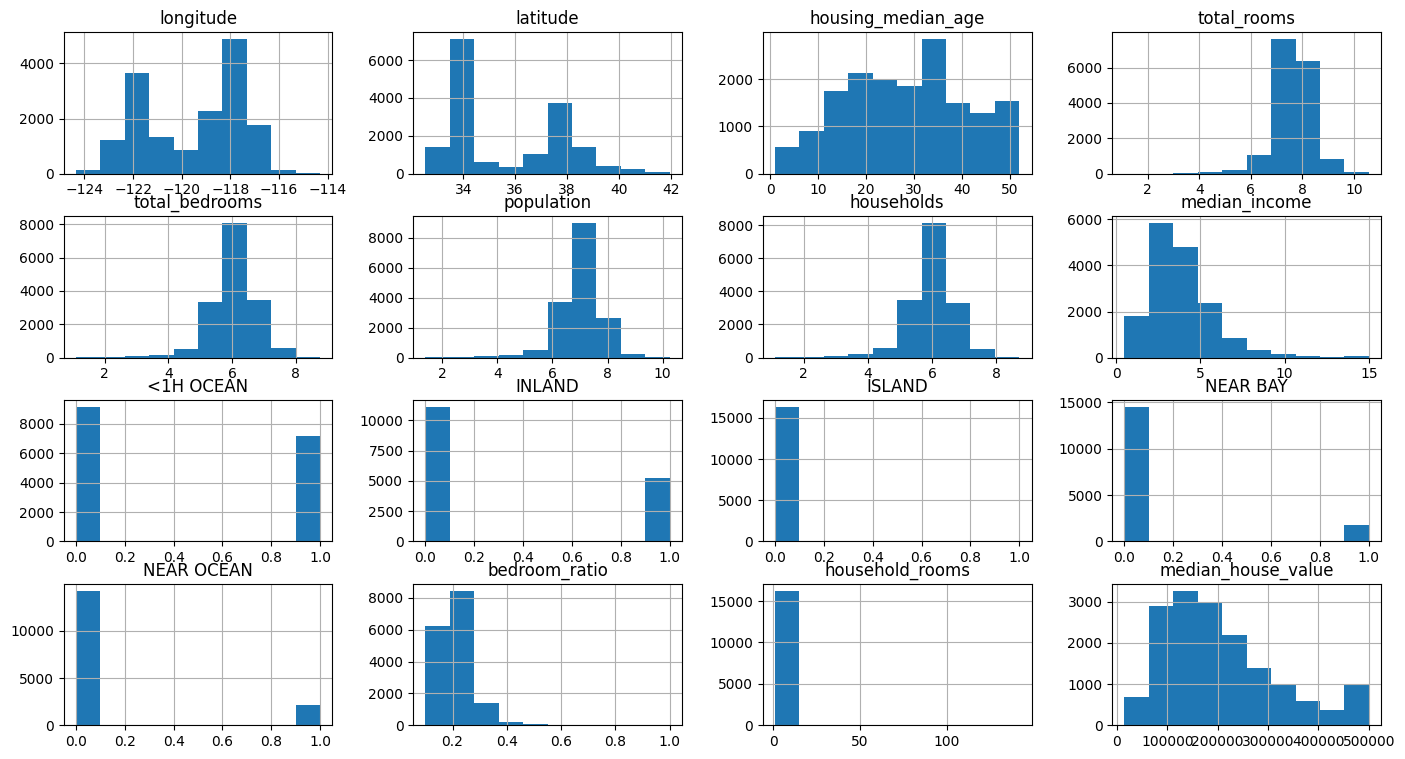

In [14]:
train_data.hist(figsize = (17, 9))
plt.show()

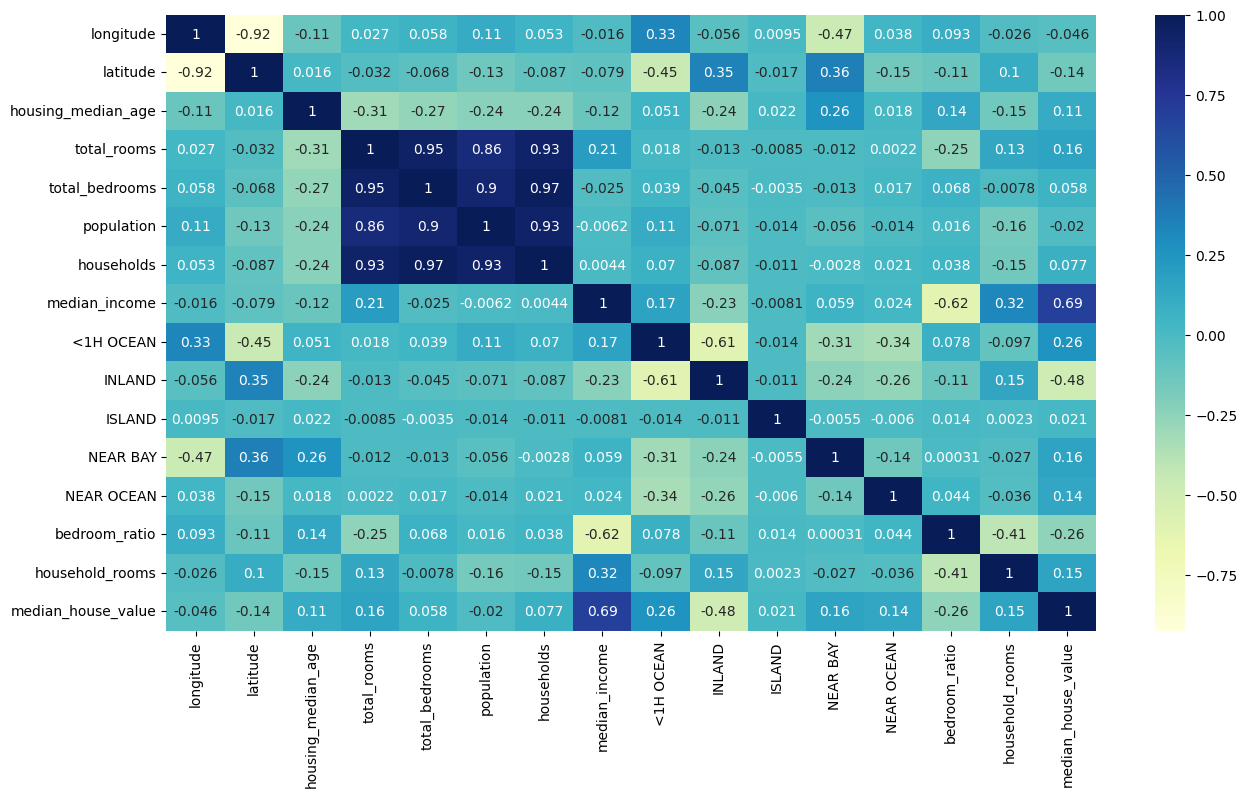

In [15]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

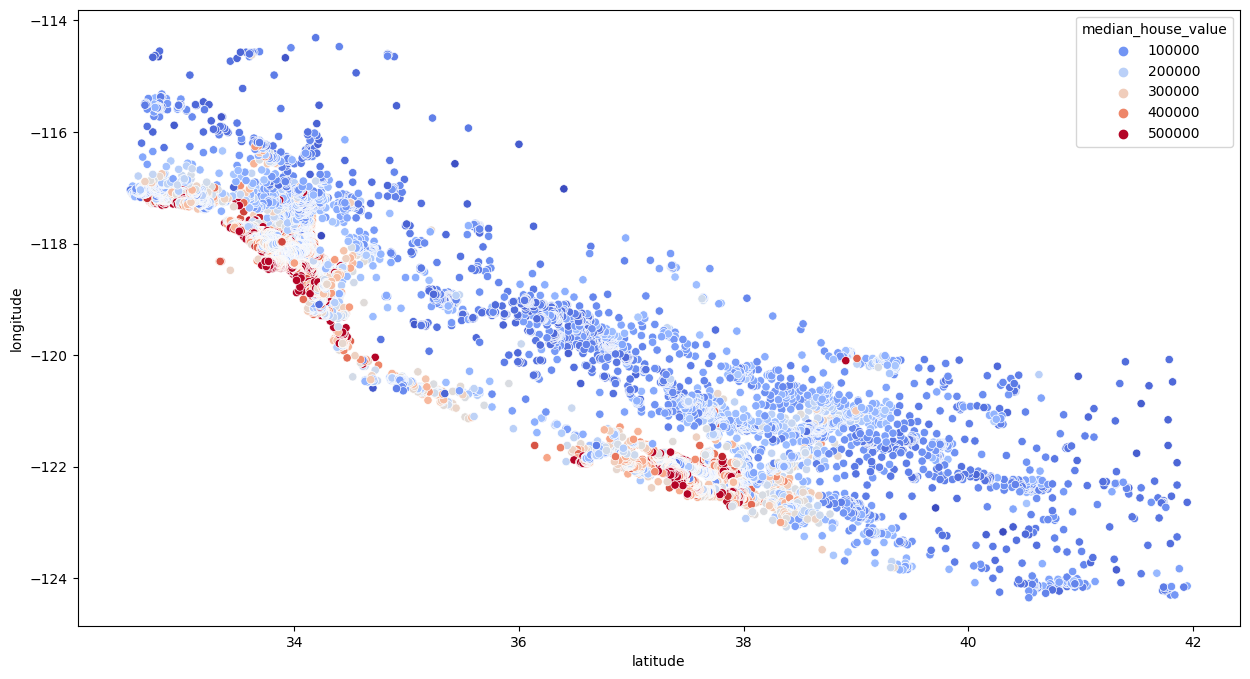

In [16]:
# Graficación de las propiedades con color segun su precio (Las más caras son las de la costa)
plt.figure(figsize = (15, 8))
sns.scatterplot(x = "latitude" , y = "longitude", data = data, hue = "median_house_value", palette = "coolwarm")
plt.show()

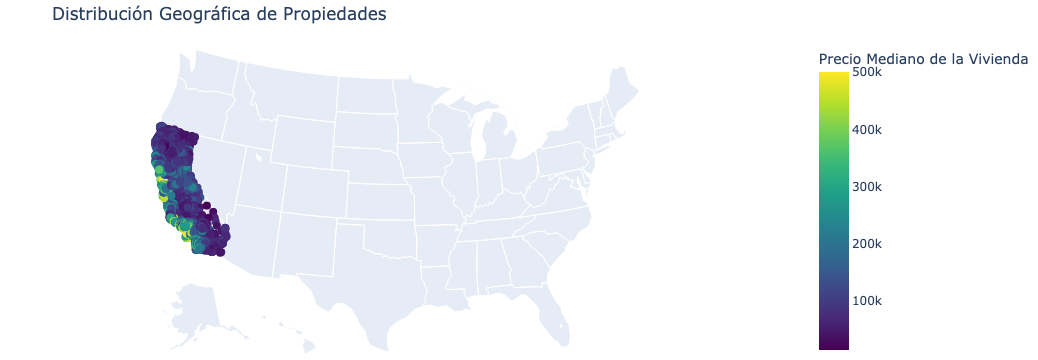

In [17]:
import plotly.graph_objects as go

# Graficar para ver si la cercania a la costa es importante para predecir
fig = go.Figure(data=go.Scattergeo(
    lat = data['latitude'],
    lon = data['longitude'],
    mode = 'markers',
    marker = dict(
        size = 8,
        color = data['median_house_value'],
        colorscale = 'Viridis_r',
        reversescale = True,
        colorbar_title = 'Precio Mediano de la Vivienda'
    )
))

fig.update_layout(
    title = 'Distribución Geográfica de Propiedades',
    geo_scope='usa',
    margin=dict(l=0, r=0, t=40, b=0),  # Ajustar los márgenes
)

fig.show()


In [18]:
from sklearn.neighbors import KNeighborsRegressor

# Separar los datos de entrada y salida
X_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]

# Crear y ajustar el modelo KNN
knnr = KNeighborsRegressor()
knnr.fit(X_train, y_train)

KNeighborsRegressor()

In [19]:
knnr.score(X_test, y_test)

0.6650319808549524

# Validación cruzada 

In [21]:
from sklearn.model_selection import cross_val_score

# Realizar prueba de validación cruzada
scores = cross_val_score(knnr, X_train, y_train, cv=5, scoring='r2')

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:")
print("R2 Score promedio:", scores.mean())
print("R2 Scores individuales:", scores)

Resultados de la validación cruzada:
R2 Score promedio: 0.6694587562788914
R2 Scores individuales: [0.67889644 0.68057589 0.66657647 0.66045573 0.66078926]
